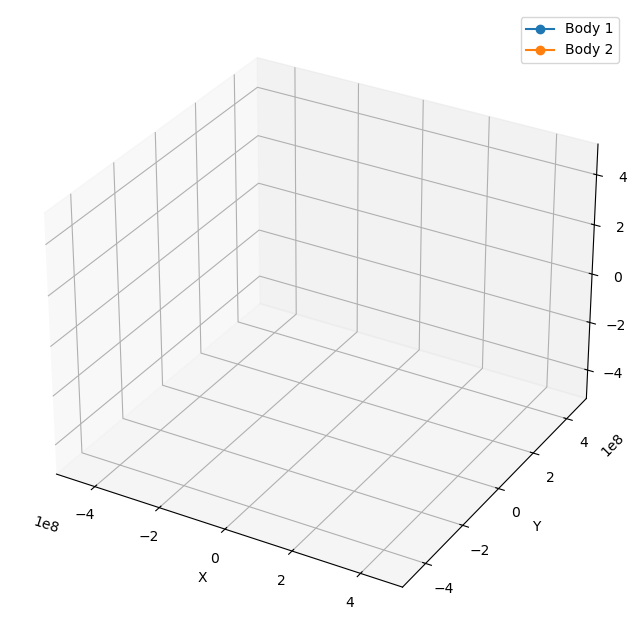

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

# Constants
G = 6.67430e-11  # Gravitational constant

# Masses of the bodies (in kg)
mass1 = 5.972e24  # Example: Earth mass
mass2 = 7.348e22  # Example: Moon mass

# Initial positions (in meters) and velocities (in meters per second)
initial_position1 = np.array([0, 0, 0])
initial_velocity1 = np.array([0, 0, 0])
initial_position2 = np.array([384400000, 0, 0])  # Approximate distance Earth-Moon
initial_velocity2 = np.array([0, 1022, 0])  # Approximate orbital velocity of Moon

def two_body_equations(t, y):
    r1 = y[:3]
    v1 = y[3:6]
    r2 = y[6:9]
    v2 = y[9:12]

    r = np.linalg.norm(r2 - r1)
    f_gravity = G * mass1 * mass2 / r**2

    a1 = f_gravity * (r2 - r1) / (r * mass1)
    a2 = f_gravity * (r1 - r2) / (r * mass2)

    return np.concatenate((v1, a1, v2, a2))

# Time span
t_span = (0, 7 * 24 * 3600)  # Simulating for 7 days
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial state vector
initial_state = np.concatenate((initial_position1, initial_velocity1, initial_position2, initial_velocity2))

# Solve the differential equations
solution = solve_ivp(two_body_equations, t_span, initial_state, t_eval=t_eval)

# Extracting positions from the solution
positions1 = solution.y[:3, :]
positions2 = solution.y[6:9, :]

# Setting up the figure and axis for 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initializing the trajectories for animation
trajectory1, = ax.plot([], [], [], 'o-', label='Body 1')
trajectory2, = ax.plot([], [], [], 'o-', label='Body 2')
ax.set_xlim([-5e8, 5e8])
ax.set_ylim([-5e8, 5e8])
ax.set_zlim([-5e8, 5e8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Initialization function for FuncAnimation
def init():
    trajectory1.set_data([], [])
    trajectory1.set_3d_properties([])
    trajectory2.set_data([], [])
    trajectory2.set_3d_properties([])
    return trajectory1, trajectory2,

# Animation update function
def update(num, positions1, positions2, trajectory1, trajectory2):
    trajectory1.set_data(positions1[0, :num], positions1[1, :num])
    trajectory1.set_3d_properties(positions1[2, :num])
    trajectory2.set_data(positions2[0, :num], positions2[1, :num])
    trajectory2.set_3d_properties(positions2[2, :num])
    return trajectory1, trajectory2,

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(t_eval), fargs=(positions1, positions2, trajectory1, trajectory2),
                    init_func=init, blit=False, interval=50)

plt.show()

